<a href="https://colab.research.google.com/github/italocdantas/data_science/blob/main/Analisando_os_Dados_do_Airbnb(Paris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Paris, França*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Estou conduzindo um estudo sobre a análise de dados do Airbnb em Paris devido à relevância e oportunidade proporcionadas pelo fato de Paris ser a sede das Olimpíadas de 2024. Este evento global não apenas atrai uma quantidade significativa de turistas e atletas, mas também tem um impacto direto no mercado de hospedagem. Ao analisar os dados do Airbnb, posso obter insights valiosos sobre as tendências de hospedagem, preços, disponibilidade e demanda durante este período de grande movimento. Esse estudo permitirá entender melhor como eventos de grande escala influenciam o mercado de locação temporária e fornecerá informações estratégicas tanto para anfitriões quanto para viajantes.**





## Obtenção dos Dados


In [46]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/france/ile-de-france/paris/2024-06-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [48]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7241227,Appartement F2 de 50m2,23740469,Marie Josee,NaN,Buttes-Montmartre,48.889930,2.366960,Entire home/apt,NaN,365,2,2018-08-25,0.03,1,0,0,NaN
1,738818740125140768,Studette calme paris,33108376,Kaïs,NaN,Passy,48.852160,2.262300,Entire home/apt,NaN,4,6,2023-09-26,0.30,1,0,2,7511607442416
2,6640639,Chambre de Bonne,34756427,Ricardo,NaN,Vaugirard,48.831000,2.289190,Entire home/apt,NaN,365,0,NaN,NaN,1,0,0,NaN
3,8387171,Faidherbe Chaligny Square,44188365,Benoit,NaN,Reuilly,48.848980,2.386090,Entire home/apt,NaN,365,0,NaN,NaN,1,0,0,NaN
4,1097932353733680407,Beau studio au cœur de Barbès,514983472,Rebaia,NaN,Buttes-Montmartre,48.886598,2.359753,Entire home/apt,NaN,1,2,2024-04-07,0.59,1,0,2,7511808567461


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão resumida do Airbnb.
Podemos observar que ele possui a quantidade de: 95885 entradas e 18 variáveis

Na mesma página que baixamos o arquivo listing.csv. Há uma versão mais completa chamado: **listings.csv.gz**



In [49]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {}".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 95885
Variaveis:	 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 33% das linhas.
* A variáveL `host_name` têm aproximadamente 0,1% dos valores nulos.


In [50]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
reviews_per_month,0.335694
last_review,0.335694
price,0.222204
license,0.206988
host_name,0.000083
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**
Para identificar a distribuição das variáveis, irei plotar o histograma

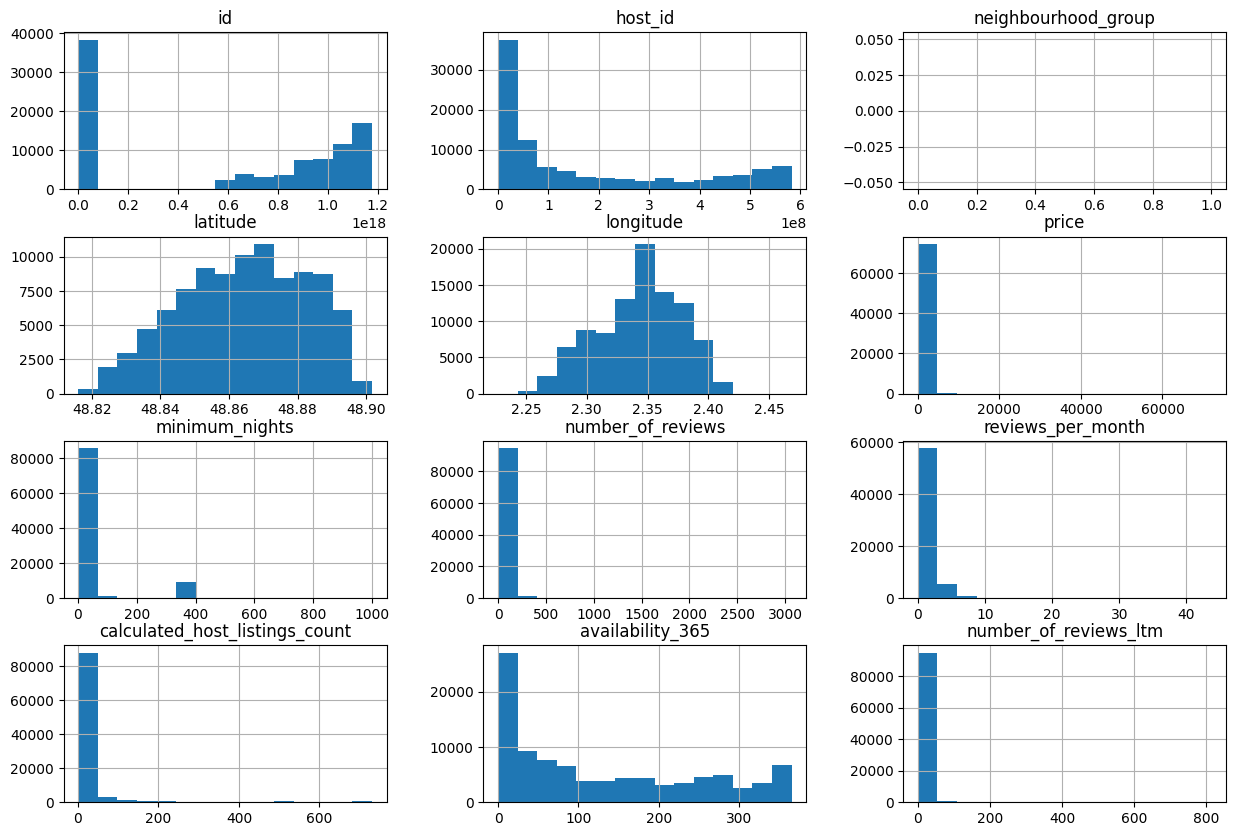

In [51]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Identificando *outliers* presentes**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [52]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,74579.000000,95885.000000,95885.000000,63697.000000,95885.000000,95885.000000
mean,289.075155,40.632539,19.888189,1.121445,21.602326,127.179966
std,684.010923,106.808557,52.040205,1.399308,84.659243,119.740013
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,109.000000,2.000000,0.000000,0.210000,1.000000,17.000000
50%,164.000000,3.000000,3.000000,0.650000,1.000000,88.000000
75%,290.000000,5.000000,18.000000,1.510000,2.000000,232.000000
max,72000.000000,1000.000000,3067.000000,43.720000,730.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 290, porém seu valor máximo é 72000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

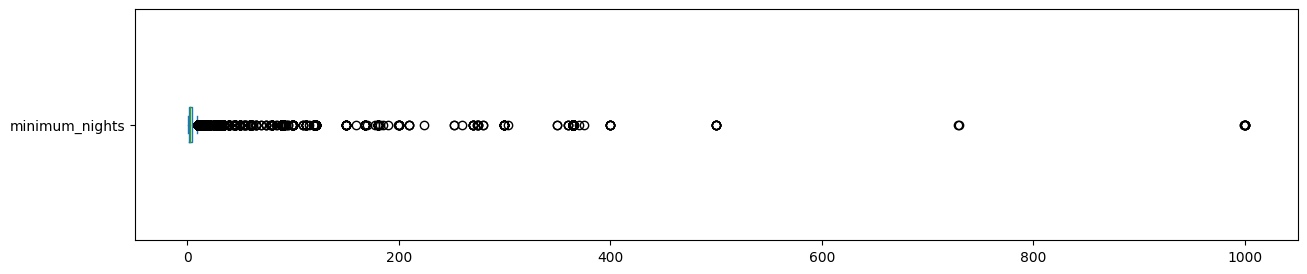

minimum_nights: valores acima de 30:
11090 entradas
Corresponde um total de 11.5659%


In [53]:
# minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("Corresponde um total de {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

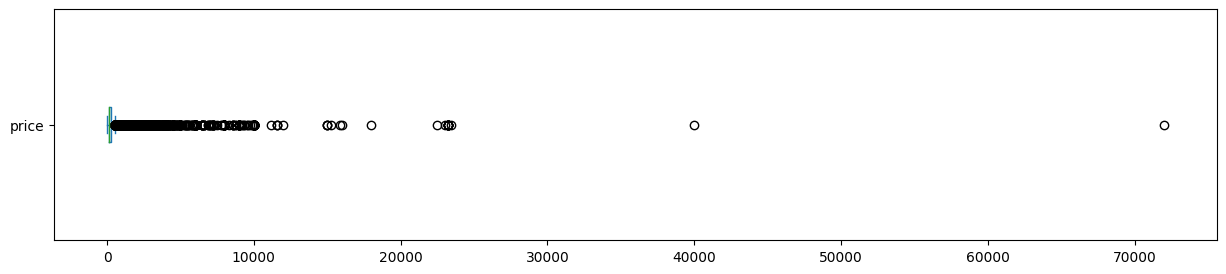


price: valores acima de 2000
728 entradas
0.7592%


In [54]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

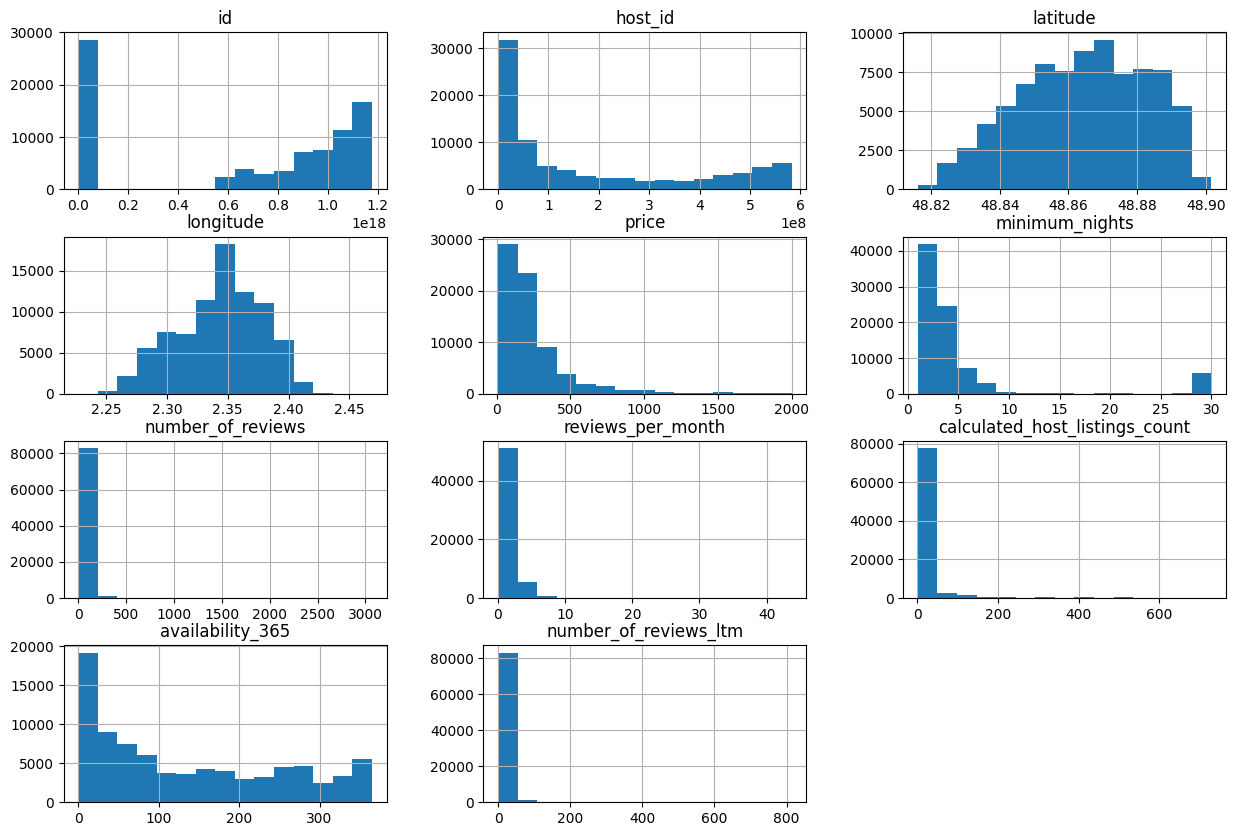

In [55]:
# remover os *outliers* em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

In [56]:
# ver a média da coluna `price`
print("Valor Médio no preço do aluguel:\t{}".format(df_clean.price.mean()))

Valor Médio no preço do aluguel:	247.26678994704548


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`



In [57]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.097607,-0.083474,-0.071635,0.010706,0.047549
minimum_nights,-0.097607,1.000000,-0.075052,-0.200604,0.117558,0.112996
number_of_reviews,-0.083474,-0.075052,1.000000,0.493128,-0.032084,0.070126
reviews_per_month,-0.071635,-0.200604,0.493128,1.000000,0.015184,0.162940
calculated_host_listings_count,0.010706,0.117558,-0.032084,0.015184,1.000000,0.132449
availability_365,0.047549,0.112996,0.070126,0.162940,0.132449,1.000000


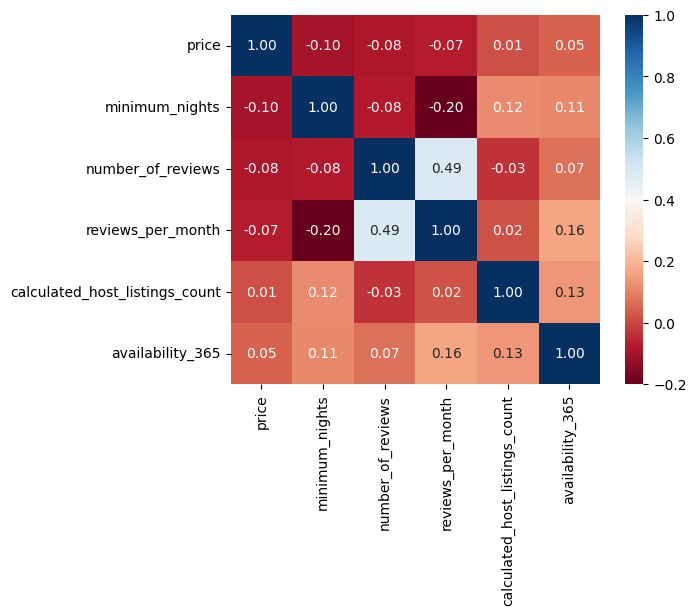

In [58]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [59]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,74122
Private room,8851
Hotel room,708
Shared room,396


In [41]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

,count
room_type,
Entire home/apt,88.159663
Private room,10.527255
Hotel room,0.842085
Shared room,0.470997


### **Q8. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [45]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

,price
neighbourhood,
Élysée,371.125843
Palais-Bourbon,365.860908
Passy,357.213701
Luxembourg,331.039537
Louvre,330.337524
Hôtel-de-Ville,286.556595
Temple,266.186117
Opéra,263.812500
Bourse,261.704973


In [42]:
# ver quantidade de entradas por bairro
df_clean.neighbourhood.value_counts()


,count
neighbourhood,
Buttes-Montmartre,9281
Popincourt,7419
Vaugirard,6861
Batignolles-Monceau,5843
Entrepôt,5840
Passy,5393
Buttes-Chaumont,4883
Ménilmontant,4672
Opéra,3996


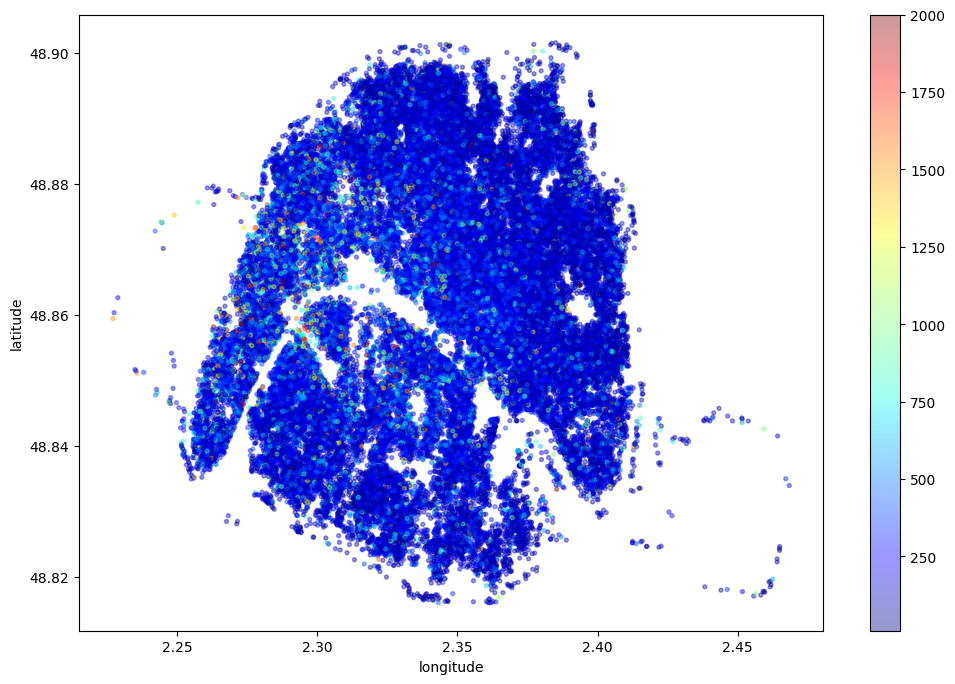

In [44]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`

print("Média do mínimo de noites para alugel é de:\t{}".format(df_clean.minimum_nights.values.mean()))

Média do mínimo de noites para alugel é de:	4.713881323072897


## Conclusões


A análise dos dados do Airbnb em Paris, França, revelou insights valiosos sobre o comportamento do mercado de hospedagem na cidade, especialmente em um contexto tão singular como a realização das Olimpíadas de 2024. Utilizando dados fornecidos pelo portal Inside Airbnb, conseguimos investigar diversas métricas e tendências que caracterizam o mercado de locação temporária em Paris.

Principais Achados:

- Volume de Dados e Variáveis: O conjunto de dados utilizado continha 95.885 entradas e 18 variáveis, proporcionando uma base robusta para análises detalhadas.

- Valores Ausentes: Identificamos que algumas variáveis, como 'neighbourhood_group', possuíam valores completamente ausentes, enquanto outras, como 'reviews_per_month' e 'last_review', tinham aproximadamente 33% de valores nulos.

- Distribuição e Outliers: Observamos a presença de outliers significativos nas variáveis 'price' e 'minimum_nights', que distorciam a representação gráfica dos dados. Após a remoção desses outliers, foi possível obter uma visualização mais precisa da distribuição das variáveis.

- Correlação entre Variáveis: A análise de correlação destacou relações entre variáveis como 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', e 'availability_365', permitindo uma compreensão mais profunda dos fatores que influenciam os preços e a disponibilidade das propriedades.

- Tipos de Imóveis e Localidades: Identificamos que a maioria dos anúncios no Airbnb em Paris são de apartamentos inteiros. Além disso, as localidades com os preços médios mais altos foram determinadas, fornecendo um panorama das áreas mais caras e procuradas da cidade.